<a href="https://colab.research.google.com/github/Mariannly/ISYA2025/blob/main/Python_for_Astrophysics/6_tutorial_py4astro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualisation of simulation data (Part II)

We will use pyvista to open and view the results of an MHD simulation of an Orszag-Tang vortex, which generates turbulence.

- pyvista: https://docs.pyvista.org/index.html

## The Orszag Tang Vortex

We will fetch the data files from a GitHub repository.

### Download simulation data:

In [1]:
# Import libraries
from google.colab import drive

In [2]:
# Mount Google Drive
print("Mounting Google Drive...")
drive.mount('/content/drive')

Mounting Google Drive...
Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/ISYA2025/simulations
!pwd

[Errno 2] No such file or directory: '/content/drive/MyDrive/ISYA2025/simulations'
/content
/content


In [4]:
# Download the full simulation.
!wget https://raw.githubusercontent.com/wbandabarragan/physics-teaching-data/main/2D-data/Orszag_Tang-MHD.zip

--2025-07-10 21:25:26--  https://raw.githubusercontent.com/wbandabarragan/physics-teaching-data/main/2D-data/Orszag_Tang-MHD.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84331313 (80M) [application/zip]
Saving to: ‘Orszag_Tang-MHD.zip’

Orszag_Tang-MHD.zip 100%[===================>]  80.42M   258MB/s    in 0.3s    

2025-07-10 21:25:27 (258 MB/s) - ‘Orszag_Tang-MHD.zip’ saved [84331313/84331313]



### Double check:

In [5]:
!ls -ltr

total 82364
drwxr-xr-x 1 root root     4096 Jul  9 21:17 sample_data
drwx------ 5 root root     4096 Jul 10 21:25 drive
-rw-r--r-- 1 root root 84331313 Jul 10 21:25 Orszag_Tang-MHD.zip


### Unzip contents:

In [6]:
!unzip -q Orszag_Tang-MHD.zip

### Check simulation files:

In [7]:
%cd Orszag_Tang-MHD

/content/Orszag_Tang-MHD


### Double check that one of the files is there:

In [8]:
!ls -ltr data.0060.vtk

-rw-r--r-- 1 root root 1575352 Aug 11  2022 data.0060.vtk


### Install pyvista with pip:

pyvista is not a standard library, pre-installed in the Google Colab server, so we need to add it manually.

In [9]:
!pip install pyvista

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 67.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 MB 8.0 MB/s eta 0:00:00


In [10]:
# Import libraries
import pyvista as pv
import numpy as np
import matplotlib.pyplot as plt

### File path:

In [11]:
# Define filename
file_name = "data.0060.vtk"

# We collect the data into a mesh
mesh_ot = pv.read(file_name)

### Check metadata:

In [12]:
# Mesh information
#print(mesh_ot)
#print(mesh_ot.dimensions)
#print(mesh_ot.n_cells)
#print(mesh_ot.n_arrays)
#print(mesh_ot.array_names)
#print(mesh_ot.bounds)

In [13]:
# Density array
dens = pv.get_array(mesh_ot, "rho", preference = "cell")

# Array is flattened
#print(dens.shape)

In [14]:
# Reshape the array
dens_2d = dens.reshape(mesh_ot.dimensions[1] - 1, mesh_ot.dimensions[0] - 1)

#print(dens_2d.shape)

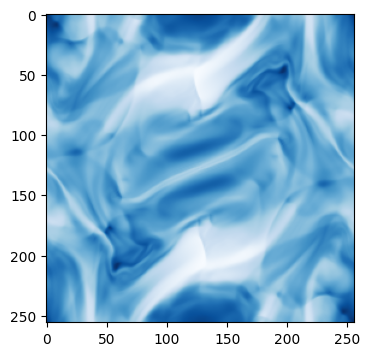

In [15]:
# Figure

plt.figure(figsize=(5,4))

plt.imshow(dens_2d, cmap = "Blues")

plt.show()

### Create meshgrid using metadata:

In [16]:
# Create coordinate vectors:
x = np.linspace(mesh_ot.bounds[0], mesh_ot.bounds[1], mesh_ot.dimensions[1] - 1)
y = np.linspace(mesh_ot.bounds[2], mesh_ot.bounds[3], mesh_ot.dimensions[0] - 1)

#print(x,y)
# Generate Grid
x_2d, y_2d = np.meshgrid(x, y)

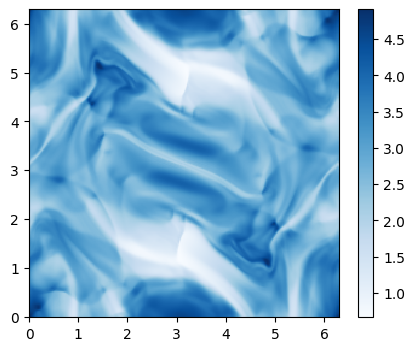

In [17]:
# Figure
plt.figure(figsize=(5,4))

z = plt.pcolor(x_2d, y_2d, dens_2d, cmap = "Blues")

plt.colorbar(z)

plt.show()

### Live Animated PLots:

In [18]:
from ipywidgets import interact, IntSlider

In [25]:
# Set number of VTK files
n_files = 60

# File name format
fname = "./data.{:04d}.vtk"

# Open empty lists/objects
densities = []

for t in range(n_files):
    # Get filename
    filename = fname.format(t)

    # Read mesh
    mesh_ot = pv.read(filename)

    # Get density array
    dens = pv.get_array(mesh_ot, "rho", preference="cell")

    # Reshape array: 1D -> 2D
    dens_2d = dens.reshape(mesh_ot.dimensions[0] - 1, mesh_ot.dimensions[1] - 1)

    # Append images to empty object
    densities.append(dens_2d)

# Animation function
def plot_frame(t):
    plt.figure(figsize=(6,5))

    plt.pcolor(x, y, densities[t], cmap="Blues", shading="auto")

    plt.colorbar(label="Density")

    plt.xlabel("x")
    plt.ylabel("y")

    plt.show()

In [27]:
# Interactive slider (this may be slow)
#_ = interact(plot_frame, t=IntSlider(min=0, max=n_files - 1, step=1, value=0))

### Vector plots (velocity):

In [21]:
# Density array
velx = pv.get_array(mesh_ot, "vx1", preference = "cell")
vely = pv.get_array(mesh_ot, "vx2", preference = "cell")

# The array is flattened -> 1D
#print(velx.shape)
#print(vely.shape)

# Reshape the array
velx_2d = velx.reshape(mesh_ot.dimensions[1] - 1,\
          mesh_ot.dimensions[0] - 1)
vely_2d = vely.reshape(mesh_ot.dimensions[1] - 1,\
          mesh_ot.dimensions[0] - 1)

#print(velx_2d.shape, vely_2d.shape)

In [22]:

# Calculate the modulus of the velocity

modulus_velocity = np.sqrt(velx_2d**2 + vely_2d**2)

#print(np.min(modulus_velocity), np.max(modulus_velocity))

## Downsample for better visualisation:

In [23]:
# Downsampling step
step = 6

# Apply slicing
x_ds = x_2d[::step, ::step]
y_ds = y_2d[::step, ::step]
velx_ds = velx_2d[::step, ::step]
vely_ds = vely_2d[::step, ::step]
modulus_ds = modulus_velocity[::step, ::step]

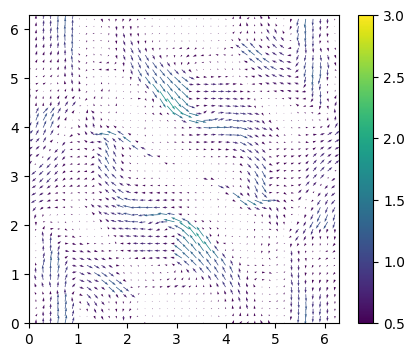

In [24]:
# Velocity Map
plt.figure(figsize=(5,4))

z = plt.quiver(x_ds, y_ds, velx_ds, vely_ds, modulus_ds, clim=(0.5, 3))

plt.colorbar(z)

plt.xlim(mesh_ot.bounds[0], mesh_ot.bounds[1])
plt.ylim(mesh_ot.bounds[0], mesh_ot.bounds[1])

plt.show()